In [42]:
# from mpl_toolkits.mplot3d import Axes3D
# import matplotlib.pyplot as plt
# import csv
# import numpy as np
# import os 

# from sklearn.feature_extraction.text import CountVectorizer
# import nltk, re
# from nltk.corpus import stopwords
# from sklearn.naive_bayes import BernoulliNB
# from sklearn import metrics
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.model_selection import GridSearchCV
# from sklearn import svm
# from sklearn.metrics import make_scorer
# from sklearn.metrics import accuracy_score
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.decomposition import TruncatedSVD
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn import linear_model 


In [105]:
# Adapted from Code Sample Snippet Provided By Institut für Neuroinformatik
# at http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset

def readTrafficSignsSimple(rootpath, feature_type):    
    vectors = [] # feature vectors
    labels = [] # corresponding labels
    # loop over all 43 classes
    for c in range(0,43):
        if c in topten:
            print(c)
            subfolder = rootpath + feature_type + format(c, '05d') # subdirectory for class
            path, dirs, files = os.walk(subfolder).__next__()
            for file in files:
                vectors.append(np.genfromtxt(subfolder + '/' + file))
                labels.append(c) # the 8th column is the label
    return vectors, labels

def countSamples(rootpath):
    counts = []
    counter = 0
    # loop over all 43 classes
    for c in range(0,43):
        prefix = rootpath + '/Images/' + format(c, '05d') + '/' # subdirectory for class
        gtFile = open(prefix + 'GT-'+ format(c, '05d') + '.csv') # annotations file
        gtReader = csv.reader(gtFile, delimiter=';') # csv parser for annotations file
        gtReader.__next__() # skip header
        # loop over all images in current annotations file
        for row in gtReader:
            counter += 1
        counts.append(counter)
        counter = 0
        gtFile.close()
    return counts



In [ ]:
print(topten)

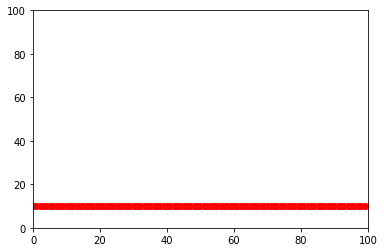

In [65]:
x = np.arange(0,100,1)
y = [10]*100
plt.plot(x,y,'ro')
plt.axis([0,100,0,100])
plt.show()

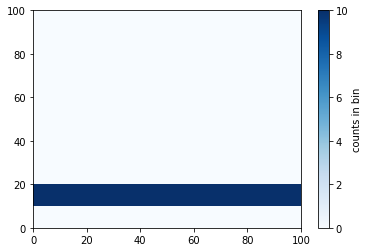

In [69]:
#test coordinate representation for pyplots 2D hist 
plt.hist2d(x, y, bins=10, range=[[0,100],[0,100]], cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

In [87]:
#extract the counts only, this is to help us observe that x-values correspond to rows in counts and y to columns
counts, xedges, yedges = np.histogram2d(x, y, bins=10, range=[[0,100],[0,100]])
print(counts)

[[ 0. 10.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 10.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 10.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 10.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 10.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 10.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 10.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 10.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 10.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 10.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [88]:
counts = counts / sum(sum(counts)) #convert to probabilities
print(np.min(counts)) #should be >= 0
print(np.max(counts)) #should be <= 1
print(np.sum(counts)) #should be = 1

0.0
0.1
1.0


In [89]:
#match appropriate center x,y coordinate with computed bin probabilities
probs = []
for i in range(0,len(counts)):
    for j in range(0,len(counts[0])):
        probs.append([((i+1)*10 - 5, (j+1)*10 - 5), counts[i,j]])

In [95]:
# for i in np.arange(0,90,10):
#     print(probs[i:i+10])

In [108]:
counts = countSamples('./GTSRB/Final_Training')
topten = np.argsort(counts)[::-1][0:10]
print(topten)
print([counts[i] for i in topten])

[ 2  1 13 12 38 10  4  5 25  9]
[2250, 2220, 2160, 2100, 2070, 2010, 1980, 1860, 1500, 1470]


In [25]:
sum(counts)

39209

In [22]:
trainVectors, trainLabels = readTrafficSignsSimple('./GTSRB/Final_Training', '/HueHist/')

1
2
4
5
9
10
12
13
25
38


In [31]:
#randomize vectors and labels
indexes = [i for i in range(0,len(trainVectors))]
np.random.shuffle(indexes)
trainVectors = np.array(trainVectors) 
trainVectors = trainVectors[indexes]
trainLabels = np.array(trainLabels)
trainLabels = trainLabels[indexes]

In [32]:
print(len(trainVectors))
print(len(trainLabels))
print(counts)
print(trainLabels[211:215]) # check randomization
#39,209 training images in 43 classes

19620
19620
[210, 2220, 2250, 1410, 1980, 1860, 420, 1440, 1410, 1470, 2010, 1320, 2100, 2160, 780, 630, 420, 1110, 1200, 210, 360, 330, 390, 510, 270, 1500, 600, 240, 540, 270, 450, 780, 240, 689, 420, 1200, 390, 210, 2070, 300, 360, 240, 240]
[ 4 25  9  1]


In [8]:
print(sum(counts[i] for i in topten))

19620


In [43]:
print(len(trainVectors[0]))

256


In [9]:
summand = 0
for i in counts:
    if i > 500:
        summand += (i - 500)
print(summand)

21239


In [33]:
# Adapted from Code Sample Snippet Above Provided By Institut für Neuroinformatik

def readTrafficSignsTest(rootpath, feature_type):
    vectors = [] # feature vectors
    labels = [] # corresponding labels
    counter = 0
    # loop over all 43 classes
    prefix = rootpath + '/Images/'
    gtFile = open(prefix + 'GT-final_test' + '.csv') # annotations file
    gtReader = csv.reader(gtFile, delimiter=';') # csv parser for annotations file
    gtReader.__next__() # skip header
    # loop over all images in current annotations file
    for row in gtReader:
        if int(row[7]) in topten:
            vectors.append(np.genfromtxt(rootpath + feature_type + row[0][:-4] + '.txt'))
            labels.append(row[7]) # the 8th column is the label
        #counter += 1
        #if counter == 6000:
        #    break
    gtFile.close()
    return vectors, labels

def countSamplesTest(rootpath):
    counts = [0]*43
    counter = 0
    prefix = rootpath + '/Images/'
    gtFile = open(prefix + 'GT-final_test' + '.csv') # annotations file
    gtReader = csv.reader(gtFile, delimiter=';') # csv parser for annotations file
    gtReader.__next__() # skip header
    # loop over all images in current annotations file
    for row in gtReader:
        counts[int(row[7])] += 1
        counter += 1
        if counter == 6000:
            break
    gtFile.close()
    return counts


In [11]:
#12,630 test images or the corresponding pre-calculated features in random order
testVectors, testLabels = readTrafficSignsTest('./GTSRB/Final_Testing', '/HueHist/')
#counts = countSamplesTest('./GTSRB/Final_Testing')
#print(counts)

In [12]:
print(len(testVectors))
print(len(testLabels))
#print(testVectors[0])

6480
6480


In [85]:
rfc = RandomForestClassifier(n_estimators=50, criterion='gini', max_depth=None, min_samples_split=2, 
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', 
                             max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, 
                             bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, 
                             warm_start=False, class_weight='balanced')
rfc.fit(trainVectors, trainLabels)
rfc_prediction = rfc.predict(testVectors)
print("Accuracy: " + str(metrics.accuracy_score(rfc_prediction, testLabels)))
print("F1: " + str(metrics.f1_score(rfc_prediction, testLabels, average=None)))

Accuracy: 0.4251543209876543
F1: [0.39034853 0.50238908 0.79231863 0.28138163 0.25379001 0.04181185
 0.77987421 0.38297872 0.31096007 0.17941953]


In [88]:
print(rfc_prediction[0:10])
print(testLabels[0:10])

['1' '38' '38' '12' '2' '38' '2' '10' '38' '4']
['1', '38', '38', '12', '25', '12', '4', '9', '38', '4']


In [15]:
linear_svc = svm.LinearSVC(penalty='l2', loss='squared_hinge', dual=True, tol=0.0001, C=1.0, multi_class='ovr', 
                    fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=1, random_state=None, 
                    max_iter=1000)
linear_svc.fit(trainVectors, trainLabels)
linear_svc_prediction = linear_svc.predict(testVectors)
print("Accuracy: " + str(metrics.accuracy_score(linear_svc_prediction, testLabels)))
print("F1: " + str(metrics.f1_score(linear_svc_prediction, testLabels, average=None)))

Accuracy: 0.3523148148148148
F1: [0.3951578  0.39760837 0.65719819 0.08358209 0.15965788 0.01821494
 0.68873329 0.09832402 0.2780441  0.0928    ]


In [19]:
knn = KNeighborsClassifier(n_neighbors=50, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', 
                           metric_params=None, n_jobs=1)
knn.fit(trainVectors, trainLabels)
knn_prediction = knn.predict(testVectors)
print("Accuracy: " + str(metrics.accuracy_score(knn_prediction, testLabels)))
print("F1: " + str(metrics.f1_score(knn_prediction, testLabels, average=None)))

Accuracy: 0.3470679012345679
F1: [0.37551501 0.40244836 0.68347826 0.13404826 0.21608643 0.08285386
 0.76012966 0.31918936 0.2473041  0.19027484]


In [27]:
# indices = [i for i, x in enumerate(trainVectors)]
# np.random.shuffle(indices)
# trainVectorsRandom = [trainVectors[i] for i in indices[:-3000]]
# trainLabelsRandom = [trainLabels[i] for i in indices[:-3000]]
# testVectorsRandom = [trainVectors[i] for i in indices[-3000:]]
# testLabelsRandom = [trainLabels[i] for i in indices[-3000:]]

In [29]:
# lr = linear_model.LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, 
#                                      intercept_scaling=1, class_weight='balanced', random_state=None, solver='saga', 
#                                      max_iter=100, multi_class='ovr', verbose=1, warm_start=False, n_jobs=1)
# lr.fit(trainVectorsRandom, trainLabelsRandom)
# lr_prediction = lr.predict(testVectorsRandom)
# print("Accuracy: " + str(metrics.accuracy_score(lr_prediction, testLabelsRandom)))
# print("F1: " + str(metrics.f1_score(lr_prediction, testLabelsRandom, average=None)))

Accuracy: 0.3903333333333333
F1: [0.38286479 0.46649485 0.68807339 0.25320513 0.28863346 0.12345679
 0.71255061 0.13333333 0.22485207 0.28773585]


In [34]:
#39,209 training images in 43 classes
trainVectors, trainLabels = readTrafficSignsAdapted('./GTSRB/Final_Training', '/Haar/')

In [36]:
print(len(trainVectors[0]))
print(len(trainLabels))

11584
19620


In [37]:
#12,630 test images or the corresponding pre-calculated features in random order
testVectors, testLabels = readTrafficSignsTest('./GTSRB/Final_Testing', '/Haar/')

In [38]:
print(len(testVectors))
print(len(testLabels))

6480
6480


In [41]:
from sklearn.decomposition import PCA
pca = PCA(n_components=500, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)
pca_trainVectors = pca.fit_transform(trainVectors)
pca_testVectors = pca.transform(testVectors)
print(len(pca_trainVectors[0]))
print(len(pca_testVectors[0]))

500
500


In [43]:
rfc_haar = RandomForestClassifier(n_estimators=50, criterion='gini', max_depth=None, min_samples_split=2, 
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', 
                             max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, 
                             bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, 
                             warm_start=False, class_weight='balanced')
rfc_haar.fit(pca_trainVectors, trainLabels)
rfc_haar_prediction = rfc_haar.predict(pca_testVectors)
print("Accuracy: " + str(metrics.accuracy_score(rfc_haar_prediction, testLabels)))
print("F1: " + str(metrics.f1_score(rfc_haar_prediction, testLabels, average=None)))

Accuracy: 0.8037037037037037
F1: [0.69598965 0.85235921 0.85468862 0.93838863 0.72595281 0.90870488
 0.8577745  0.74395329 0.65957447 0.84642438]


In [44]:
linear_svc_haar = svm.LinearSVC(penalty='l2', loss='squared_hinge', dual=True, tol=0.0001, C=1.0, multi_class='ovr', 
                    fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=1, random_state=None, 
                    max_iter=1000)
linear_svc_haar.fit(pca_trainVectors, trainLabels)
linear_svc_haar_prediction = linear_svc_haar.predict(pca_testVectors)
print("Accuracy: " + str(metrics.accuracy_score(linear_svc_haar_prediction, testLabels)))
print("F1: " + str(metrics.f1_score(linear_svc_haar_prediction, testLabels, average=None)))

[LibLinear]Accuracy: 0.7958333333333333
F1: [0.59839605 0.81654957 0.77547496 0.94299789 0.78339818 0.93769799
 0.93952802 0.7298995  0.69594035 0.8239521 ]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:898: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [45]:
knn_haar = KNeighborsClassifier(n_neighbors=50, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', 
                           metric_params=None, n_jobs=1)
knn.fit(pca_trainVectors, trainLabels)
knn_haar_prediction = knn.predict(pca_testVectors)
print("Accuracy: " + str(metrics.accuracy_score(knn_haar_prediction, testLabels)))
print("F1: " + str(metrics.f1_score(knn_haar_prediction, testLabels, average=None)))

Accuracy: 0.7348765432098765
F1: [0.57319224 0.75103164 0.87885628 0.98189415 0.5667528  0.96558916
 0.86074074 0.62937063 0.51495017 0.70976253]


In [48]:
# lr_haar = linear_model.LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, 
#                                      intercept_scaling=1, class_weight='balanced', random_state=None, solver='saga', 
#                                      max_iter=500, multi_class='ovr', verbose=1, warm_start=False, n_jobs=1)
# lr_haar.fit(pca_trainVectors, trainLabels)
# lr_haar_prediction = lr_haar.predict(pca_testVectors)
# print("Accuracy: " + str(metrics.accuracy_score(lr_haar_prediction, testLabels)))
# print("F1: " + str(metrics.f1_score(lr_haar_prediction, testLabels, average=None)))

#Coef could not converge after 500 iter, remember LR is solved with SGD

In [50]:
#39,209 training images in 43 classes
trainVectors_hog, trainLabels_hog = readTrafficSignsAdapted('./GTSRB/Final_Training', '/HOG/HOG_01/')

In [52]:
print(len(trainVectors_hog[0]))
print(len(trainLabels_hog))

1568
19620


In [54]:
#12,630 test images or the corresponding pre-calculated features in random order
testVectors_hog, testLabels_hog = readTrafficSignsTest('./GTSRB/Final_Testing', '/HOG/HOG_01/')

In [56]:
print(len(testVectors_hog))
print(len(testLabels_hog))

6480
6480


In [57]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1000, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)
pca_trainVectors_hog = pca.fit_transform(trainVectors_hog)
pca_testVectors_hog = pca.transform(testVectors_hog)
print(len(pca_trainVectors_hog[0]))
print(len(pca_testVectors_hog[0]))

1000
1000


In [58]:
rfc_hog = RandomForestClassifier(n_estimators=50, criterion='gini', max_depth=None, min_samples_split=2, 
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', 
                             max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, 
                             bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, 
                             warm_start=False, class_weight='balanced')
rfc_hog.fit(pca_trainVectors_hog, trainLabels_hog)
rfc_hog_prediction = rfc_hog.predict(pca_testVectors_hog)
print("Accuracy: " + str(metrics.accuracy_score(rfc_hog_prediction, testLabels_hog)))
print("F1: " + str(metrics.f1_score(rfc_hog_prediction, testLabels_hog, average=None)))

Accuracy: 0.8350308641975308
F1: [0.67665078 0.85466377 0.95628036 0.98351648 0.69810165 0.96905016
 0.9670812  0.82268371 0.56840247 0.89088864]


In [59]:
linear_svc_hog = svm.LinearSVC(penalty='l2', loss='squared_hinge', dual=True, tol=0.0001, C=1.0, multi_class='ovr', 
                    fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=1, random_state=None, 
                    max_iter=1000)
linear_svc_hog.fit(pca_trainVectors_hog, trainLabels_hog)
linear_svc_hog_prediction = linear_svc_hog.predict(pca_testVectors_hog)
print("Accuracy: " + str(metrics.accuracy_score(linear_svc_hog_prediction, testLabels_hog)))
print("F1: " + str(metrics.f1_score(linear_svc_hog_prediction, testLabels_hog, average=None)))

[LibLinear]Accuracy: 0.9737654320987654
F1: [0.95095949 0.98855835 0.99855072 0.99653019 0.9434954  0.99170124
 0.99565847 0.97720365 0.90994518 0.99583333]


In [60]:
knn_hog = KNeighborsClassifier(n_neighbors=50, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', 
                           metric_params=None, n_jobs=1)
knn.fit(pca_trainVectors_hog, trainLabels_hog)
knn_hog_prediction = knn.predict(pca_testVectors_hog)
print("Accuracy: " + str(metrics.accuracy_score(knn_hog_prediction, testLabels_hog)))
print("F1: " + str(metrics.f1_score(knn_hog_prediction, testLabels_hog, average=None)))

Accuracy: 0.8524691358024692
F1: [0.65692175 0.907173   1.         0.99930604 0.64142195 0.99895725
 0.97473997 0.87657784 0.64157706 0.87719298]


In [ ]:
# lr_haar = linear_model.LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, 
#                                      intercept_scaling=1, class_weight='balanced', random_state=None, solver='saga', 
#                                      max_iter=500, multi_class='ovr', verbose=1, warm_start=False, n_jobs=1)
# lr_haar.fit(pca_trainVectors, trainLabels)
# lr_haar_prediction = lr_haar.predict(pca_testVectors)
# print("Accuracy: " + str(metrics.accuracy_score(lr_haar_prediction, testLabels)))
# print("F1: " + str(metrics.f1_score(lr_haar_prediction, testLabels, average=None)))

#Coef could not converge after 500 iter, remember LR is solved with SGD